<h2>Simple Model for Binary Classification in Keras from Scratch</h2>

<h3>Modules's Importations</h3>

<p>First, let's import the modules from python and its librairies that we are going to be using in this problem</p>
<ul>
    <li><strong>OS</strong> : is used to work with our differents directories (categories), for example : to know which directory we actually are, listing the folder content etc...</li>
    <li><strong>Numpy</strong> : Is used to convert data (images) into array (numpy array), for example : to reshape,to see the shape of data, and much more ...</li>
    <li><strong>matplotlib</strong> : is used to visualize data (Images)</li>
    <li><strong>Keras</strong> : keras is used here to create our deep neural model, to categorize our label, to predict , evalute and train our model and so on ...</li>
    <li><strong>Sklearn</strong> : used to split our data into train and test dataset here </li>
    <li><strong>random</strong> : is used to shuffle our dataset</li>
    <li><strong>cv2</strong> : is used to preprocess our data, for example to read images, convert rbg to rgb, to reshape and much more...</li>
</ul>

In [107]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.layers import Flatten,Dense,Input
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from random import shuffle

<h3>Data Preprocessing</h3>

<p>The data repertories path : path where we've our differents categories's folders</p>

In [3]:
dir_path ="DATASET/PetImages/"

<p>Differents categories dir : In our case we have two categories, <strong>Cat</strong> and <strong>Dog</strong></p>

In [4]:
categories = os.listdir(dir_path)

In [5]:
categories

['Cat', 'Dog']

<P>Create an empty list where we're going store our images from differents categories</P>

In [6]:
data = []

In [7]:
len(data)

0

<p>Extracting our data (Images) from categories's folders</p>

In [8]:
for category in categories:
    path = os.path.join(dir_path,category)
    classes_label = categories.index(category)
    print(path)
    for img in os.listdir(path):
        try:
            img_path = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize(img_path,(256,256))
            img_plt = cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB)
            data.append([img_plt,classes_label])
        except Exception as e:
            pass

DATASET/PetImages/Cat
DATASET/PetImages/Dog


<p>Shuffling our data (Images)</p>

In [9]:
shuffle(data)

<p>Split our data and label aprt <strong>X</strong> : data , <strong>Y</strong> : labels</p>

In [10]:
X,Y = [],[]

In [11]:
for x,y in data:
    X.append(x)
    Y.append(y)
X  = np.array(X)
Y = np.array(Y)

In [12]:
X.shape

(24946, 256, 256, 3)

In [13]:
Y.shape

(24946,)

<p>Plotting some data (Images) and there labels</p>

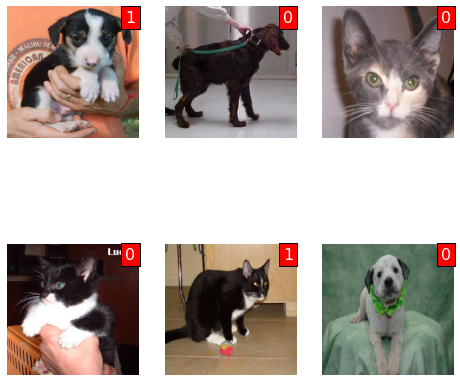

In [14]:
plt.figure(figsize=[8,8])
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X[i])
    plt.axis("off")
    plt.text(230,30,Y[i+1],fontsize=16,bbox=dict(facecolor='red', alpha=1),color=(1,1,1,1))
plt.show() 

<h3>Label Definition</h3>
<p>Now we're going to define the label dictionnary which contain both categories (Cat and Dog) and don't forget we gave 0 as index of <strong>"Cat"</strong> and 1 as <strong>"Dog"</strong>. Just we dont't need this for the moment but ones we're done , we're going to use it at the output to get the Corresponded name </p>

In [15]:
label_dict = {
    0:"Cat",
    1:"Dog"
}

<h3>Train_test_split</h3>
<P>Splitting the <strong>Data</strong> into <strong>Training set</strong> and <strong>Testing set</strong></P>

In [16]:
x_training,x_testing,y_training,y_testing = train_test_split(X,Y,test_size=0.2,random_state=100)

In [17]:
print("Training Images : {}\n".format(x_training.shape))
print("Training Labels : {}\n".format(y_training.shape))
print("Testing Images : {}\n".format(x_testing.shape))
print("Testing Labels : {}\n".format(y_testing.shape))

Training Images : (19956, 256, 256, 3)

Training Labels : (19956,)

Testing Images : (4990, 256, 256, 3)

Testing Labels : (4990,)



In [18]:
x_testing.shape

(4990, 256, 256, 3)

<h3>Data Normalization</h3>
<p>Let use the standard normalization meaning the manually normalization : data values between <strong>0</strong> and <strong>1</strong> (Labels are not normalized but they are categorized)</p>

In [19]:
x_training = x_training.astype("float32")/255.0

In [20]:
type(x_training)

numpy.ndarray

In [21]:
x_testing = x_testing.astype("float32")/255.0

In [22]:
type(x_testing)

numpy.ndarray

<h2>Define the binary classifier model</h2>

<p>The Shape like (256,256,3) doesn't work in  Dense layer, Dense layer only accepts a vector like(256*256*3,1), So lets reshape the data</p>

In [23]:
x_training = np.reshape(x_training,(-1,256*256*3))
x_testing = np.reshape(x_testing,(-1,256*256*3))

In [24]:
x_training.shape

(19956, 196608)

In [25]:
x_testing.shape

(4990, 196608)

<p>Categorizing the labels : one_hot encoding : the output will be : [[1,0],[0,1]]</p>

In [53]:
y_train = to_categorical(y_training)
y_test = to_categorical(y_testing)

In [108]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [26]:
print("New shape of x_training: {}".format(x_training.shape))
print("New shape of x_testing: {}".format(x_testing.shape))

New shape of x_training: (19956, 196608)
New shape of x_testing: (4990, 196608)


<h4><strong>Model</strong> : </h4>
<ul>
    <li><strong>Input Layer</strong> : 1024 units, initialize the batch with "he_normal" method, activation "relu", input_dims "x_train.shape[0]*x_train.shape[1]*x_train.shape[2]" : in our case : 256*256*3 = 196608</li>
    <li><strong>1 Hidden Layer</strong> :  256 units, activation "relu"</li>
    <li><strong>Ouput Layer</strong> : 2 units , (cat and dog), one unit for every category, ACTIVATION "sigmoid" for binary classification</li>
    <li><strong>Compile</strong> : compile the model</li>
    <li><strong>Fit</strong> : fit the model meaning train the model</li>
    <li><strong>Evalute</strong> : evalute the model meaning seeing how well in terme of perfomance, our model did get </li>
    <li><strong>Predict</strong> : predict an image from our dataset by our model</li>
</ul>

In [47]:
model = Sequential()

In [48]:
model.add(Dense(1024,kernel_initializer="he_normal",activation="relu",input_shape=(196608,)))

In [49]:
model.add(Dense(256,activation="relu"))
model.add(Dense(2,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              201327616 
_________________________________________________________________
dense_16 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       
Total params: 201,590,530
Trainable params: 201,590,530
Non-trainable params: 0
_________________________________________________________________


<p>Two iterations to train our model</p>

In [54]:
hist = model.fit(x_training,y_train,epochs=2,batch_size=32)

Epoch 1/2
19956/19956 [==============================] - 2165s 109ms/step - loss: 3.5515 - accuracy: 0.5416
Epoch 2/2
19956/19956 [==============================] - 2045s 102ms/step - loss: 0.6875 - accuracy: 0.5719


<p>I was a little bit constraint to stop the train due to my laptop performance : I trained it in the cloud (Google colab)</p>

In [55]:
acc,loss = model.evaluate(x_testing,y_test,verbose=1)

4990/4990 [==============================] - 63s 13ms/step


In [76]:
print("Testing Accuracy: {:5.4}%".format(acc*100))

Testing Accuracy: 68.19%


In [96]:
img = X[100]

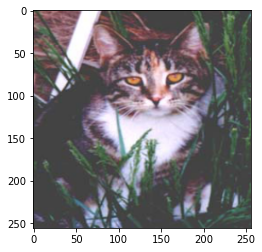

In [97]:
plt.imshow(img)
plt.show()

In [98]:
img = np.reshape(img,(-1,256*256*3))

In [99]:
img.shape

(1, 196608)

<p>Making a prediction </p>

In [110]:
result = model.predict(img)

In [111]:
result

array([[1., 0.]], dtype=float32)

<p>Now we grab the index of the max values we have in the result array which is the 0</p>

In [112]:
index = np.argmax(result)

In [113]:
index

0

<p>Look in our label_dict that we defined above , the values of index 0</p>

In [105]:
print("This is a : {}".format(label_dict[index]))

This is a : Cat


<h2>Conclusion:</h2>

Here we go, we are done creating a very basic image classification from scratch,
Lets recap:
<ol>
    <li>Preprocessing the data</li>
    <li>Creating the model </li>
    <li>Training the model</li>
    <li>Making a prediction </li>
</ol>
Hope you enjoyed this little basic introduction,
Next, we will try to go a little bit deep than that (Increase and enhance the performance)...
So looking forward to seeing you again, Take care yoursef and Have a nice day !









<h6>Have any questions
    or suggestions, please check my readme, for all my contacts. or here is my email : kondjirif@gmail.com, white me anytime and i will make sure to respond as soon as possible</h6>

<h4>Keep smiling😀...</h4>